<IPython.core.display.Javascript object>


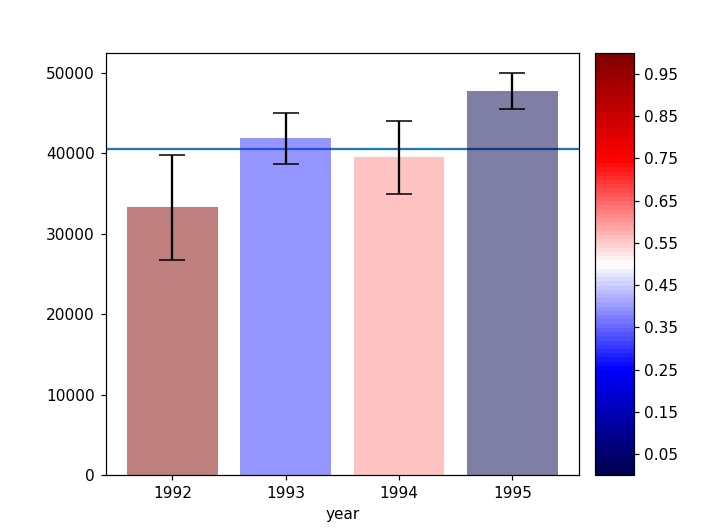

9

In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.gridspec as gridspec
pd.options.mode.chained_assignment = None

#generating data
np.random.seed(12345)
df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])

# calculating average and 95% confidence interval 
N=len(df.iloc[0,:])
df['lower_bound']=df.mean(axis=1)-1.96*df.std(axis=1)/(N**0.5)
df['mean']=df.mean(axis=1)
df['upper_bound']=df.mean(axis=1)+1.96*df.std(axis=1)/(N**0.5)
dfchart=df.loc[:,'lower_bound':'upper_bound']

# 'value' variable is the y axis value given by user and by default it is set to 42000
value=42000

# choosing seismic colormap for bar coloring
seismic = cm.get_cmap('seismic',100)
dfchart['color_grad']=[10,10,10,10]

# scalar mapping color of bars based on the 'value' variable
for i in range(len(dfchart.index)):
    dfchart.iloc[i,3]=(value-dfchart.iloc[i,0])/(dfchart.iloc[i,2]-dfchart.iloc[i,0])
dfchart.loc[dfchart['lower_bound']>value,'color_grad']=0
dfchart.loc[dfchart['upper_bound']<value,'color_grad']=1
dfchart['color']=[seismic(dfchart.iloc[0,3]),seismic(dfchart.iloc[1,3]),seismic(dfchart.iloc[2,3]),seismic(dfchart.iloc[3,3])]

#creating gridspec for main plot and legend
gspec=gridspec.GridSpec(1,10)
main=plt.subplot(gspec[:,:9])
legend=plt.subplot(gspec[:,9])
plt.subplots_adjust(left=0.15,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=2.5)
main.axhline(y=value, zorder=0)

#drawing the initial state of bar chart and legend
main.bar(range(len(dfchart.index)), dfchart['mean'],
        yerr=(dfchart['upper_bound']-dfchart['mean']), align='center', alpha=0.5,capsize=8.5,color=dfchart['color'])
main.set_xticks([0,1,2,3])
main.set_xticklabels(dfchart.index)
main.set_xlabel('year')
plt.colorbar(cm.ScalarMappable(norm=None, cmap=seismic), cax=legend,ticks=[0.05,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85,0.95])

#creating event handler(?!) function so the user is able to choose 'value' interactively
def on_press(event):
    main.cla()
    legend.cla()
    value=float(event.ydata)
    seismic = cm.get_cmap('seismic',100)
    dfchart['color_grad']=[10,10,10,10]
    for i in range(len(dfchart.index)):
        dfchart.iloc[i,3]=(value-dfchart.iloc[i,0])/(dfchart.iloc[i,2]-dfchart.iloc[i,0])
    dfchart.loc[dfchart['lower_bound']>value,'color_grad']=0
    dfchart.loc[dfchart['upper_bound']<value,'color_grad']=1
    dfchart['color']=[seismic(dfchart.iloc[0,3]),seismic(dfchart.iloc[1,3]),seismic(dfchart.iloc[2,3]),seismic(dfchart.iloc[3,3])]
    main.axhline(y=value, zorder=0)
    main.bar(range(len(dfchart.index)), dfchart['mean'],
            yerr=(dfchart['upper_bound']-dfchart['mean']), align='center', alpha=0.5,capsize=8.5,color=dfchart['color'])
    main.set_xticks([0,1,2,3])
    main.set_xticklabels(dfchart.index)
    main.set_xlabel('year')
    plt.colorbar(cm.ScalarMappable(norm=None, cmap=seismic), cax=legend,ticks=[0.05,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85,0.95])
    
#wiring up the handler
plt.gcf().canvas.mpl_connect('button_press_event', on_press)